# <center>Learning how to play Space Invaders with RL.</center>

![space invaders poster image](https://cdn-images-1.medium.com/max/1200/1*Ya6drllhmC82yh0J-elrPA.jpeg)

In [1]:
import gym
import numpy as np
from utils.frameStack import FrameStack, LazyFrames

k_frames = 4

env = gym.make('SpaceInvaders-v0')
env = FrameStack(env, k_frames)

**Observation space**: the observation space consists on 3 sequential images of size 210x160

**Action space**: there are 6 possible actions: *left, right, shoot, left-shoot, right-shoot, do nothing*.

In [2]:
print(env.observation_space.shape)
print(env.action_space)

(210, 160, 12)
Discrete(6)


### Agent acting randomly

In [3]:
# Example of how env works
total_reward = 0
env.reset()
while True:
    env.render()
    next_state, reward, done, info = env.step((env.action_space.sample())) # select random action
    total_reward += reward
    if done:
        print(total_reward)
        break
        
env.close()

5.0


### State sequence

Each state will look like a sequence of 4 frames. Every frame is cropped and preprocessed for faster and more efficient computations.

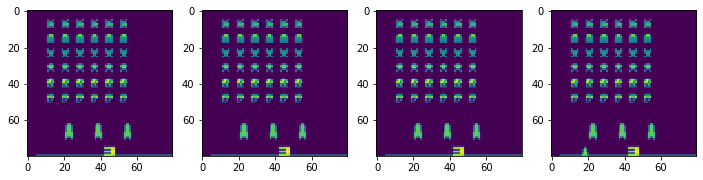

In [7]:
from dqn.model import Model
import matplotlib.pyplot as plt

env.reset()

# Create a new state
next_state, reward, done, info = env.step((env.action_space.sample())) # select random action
next_state = Model.frames_preprocessing(next_state)

# Plot the state
fig, axes = plt.subplots(1, 4, figsize=(12, 4))
ax = axes.ravel()

for i, frame in enumerate(next_state.transpose(3, 1, 2, 0).squeeze()):
    ax[i].imshow(frame)

## Training

In [6]:
from dqn.dqnAgent import DQNAgent

agent = DQNAgent(k_frames)
episodes = 1000
rewards = []

for e in range(1, episodes):
    # reset state at the beggining of each game
    state = env.reset()    
    state = Model.frames_preprocessing(state)
    
    total_reward = 0
    
    while(True):
        # env.render()
        
        action = agent.act(state)
        next_state, reward, done, info = env.step(action)
        next_state = Model.frames_preprocessing(next_state)
        
        agent.memory.add(state, action, reward, next_state, done)
        
        state = next_state
        
        total_reward += reward
        
        if done:
            print("episode: {}, score: {}".format(e, total_reward))
            rewards.append(total_reward)
            break
      
    env.close()
    # train the agent with the experience of the episode
    agent.learn(32)
    

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
episode: 1, score: 290.0
Instructions for updating:
Use tf.cast instead.
episode: 2, score: 135.0
episode: 3, score: 110.0


KeyboardInterrupt: 